<a href="https://colab.research.google.com/github/vladimirsnap/options/blob/main/ML_options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/OPT-IEP.csv')  # Замените 'Yourfile.csv' на имя вашего файла и путь к файлу


In [ ]:
data.isnull().sum()


date         0
stockpx      0
iv30         0
iv60         0
iv90         0
m1atmiv      0
m1dtex       0
m2atmiv      0
m2dtex       0
m3atmiv      0
m3dtex       0
m4atmiv      0
m4dtex       0
slope        0
deriv        0
slope_inf    0
deriv_inf    0
10dclsHV     0
20dclsHV     0
60dclsHV     0
120dclsHV    0
252dclsHV    0
10dORHV      0
20dORHV      0
60dORHV      0
120dORHV     0
252dORHV     0
dtype: int64

In [ ]:
data.head()

,date,stockpx,iv30,iv60,iv90,m1atmiv,m1dtex,m2atmiv,m2dtex,m3atmiv,...,10dclsHV,20dclsHV,60dclsHV,120dclsHV,252dclsHV,10dORHV,20dORHV,60dORHV,120dORHV,252dORHV
0,2023-06-26,26.67,71.95,85.58,78.42,71.14,27.0,87.57,55.0,79.03,...,49.81,66.37,108.99,77.77,54.88,67.12,84.20,107.94,76.88,54.64
1,2023-06-23,27.43,72.60,90.13,82.96,72.25,30.0,91.01,58.0,83.48,...,48.47,83.80,108.95,77.71,54.85,65.99,98.72,107.72,76.73,54.60
2,2023-06-22,26.86,78.15,92.33,80.87,78.15,31.0,93.28,59.0,81.17,...,49.20,96.92,108.84,77.64,54.81,68.67,108.05,107.60,76.64,54.57
3,2023-06-21,27.33,78.84,89.28,84.34,79.07,32.0,89.46,60.0,84.74,...,76.17,97.63,108.88,77.61,54.80,86.68,109.22,107.54,76.58,54.60
4,2023-06-20,28.40,79.23,92.62,82.69,79.46,33.0,92.62,61.0,82.95,...,72.42,103.96,108.70,77.46,54.69,88.03,115.64,107.24,76.38,54.48


<ipython-input-9-b2fe75f57a67>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['iv30'])


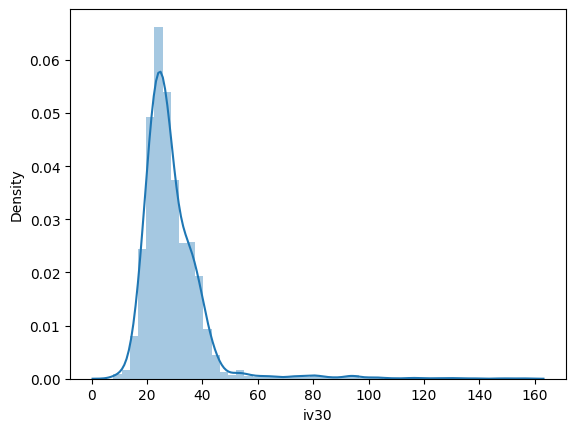

In [ ]:
sns.distplot(data['iv30'])
plt.show()

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].view('int64')


# Определение признаков и целевой переменной
X = data.drop('iv30', axis=1)
y = data['iv30']

# Разделение данных на обучающую и тестовую выборки
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка модели
model.score(X_test, y_test)



0.6516852248666865

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

# Задаем модель
#model = RandomForestRegressor(random_state=42)

# Параметры для настройки
#param_grid = {
    #'n_estimators': [50, 100, 200],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
#}

# Инициализируем поиск по сетке
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Проводим поиск по сетке
#grid_search.fit(X_train, y_train)

# Выводим наилучшие параметры
#print(grid_search.best_params_)
# {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Создайте модель случайного леса с оптимальными параметрами
forest_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, bootstrap=True, random_state=1)

# Обучите модель на тренировочных данных
forest_model.fit(X_train, y_train)

# Прогнозируйте значения на тестовых данных
forest_preds = forest_model.predict(X_test)

# Выведите среднюю абсолютную ошибку
print(mean_absolute_error(y_test, forest_preds))



0.6305546949623047


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Инициализируем модель
gb_model = GradientBoostingRegressor(random_state=42)

# Обучаем модель
gb_model.fit(X_train, y_train)

# Делаем прогнозы
gb_train_preds = gb_model.predict(X_train)
gb_valid_preds = gb_model.predict(X_valid)

# Расчитываем ошибку
gb_train_error = mean_absolute_error(y_train, gb_train_preds)
gb_valid_error = mean_absolute_error(y_valid, gb_valid_preds)

print('Gradient Boosting MAE')
print('-----------------------')
print('Training: ', gb_train_error)
print('Validation: ', gb_valid_error)


Gradient Boosting MAE
-----------------------
Training:  0.8043611933187641
Validation:  0.9759382062460352


In [ ]:
import xgboost as xgb

# Создаем объект модели XGBoost
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Обучаем модель на тренировочном наборе данных
model_xgb.fit(X_train, y_train)

# Предсказываем целевую переменную на тренировочном и валидационном наборе данных
y_train_pred_xgb = model_xgb.predict(X_train)
y_valid_pred_xgb = model_xgb.predict(X_valid)

# Считаем и печатаем MAE
print("XGBoost MAE")
print("-----------------------")
print("Training: ", mean_absolute_error(y_train, y_train_pred_xgb))
print("Validation: ", mean_absolute_error(y_valid, y_valid_pred_xgb))


XGBoost MAE
-----------------------
Training:  0.024013923158968154
Validation:  0.6359957347088547


In [ ]:
from catboost import CatBoostRegressor

# Создаем модель CatBoost
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=10)

# Обучаем модель
model.fit(X_train, y_train, verbose=200)

# Делаем предсказания на тренировочном и тестовом наборах
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

# Считаем MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_valid = mean_absolute_error(y_valid, y_valid_pred)

print("CatBoost MAE")
print("-----------------------")
print("Training: ", mae_train)
print("Validation: ", mae_valid)



0:	learn: 12.4928523	total: 322ms	remaining: 5m 21s
200:	learn: 0.7890585	total: 19.5s	remaining: 1m 17s
400:	learn: 0.3366754	total: 29.3s	remaining: 43.7s
600:	learn: 0.1820523	total: 37.4s	remaining: 24.8s
800:	learn: 0.1110721	total: 46.6s	remaining: 11.6s
999:	learn: 0.0718445	total: 55.7s	remaining: 0us
CatBoost MAE
-----------------------
Training:  0.05596049000307157
Validation:  0.7400479408414087


In [ ]:
#from sklearn.model_selection import GridSearchCV
#import xgboost as xgb

#xgboost_model = xgb.XGBRegressor()

# Define the grid of hyperparameters 'params'
#params = {
  #  'learning_rate': [0.01, 0.1, 0.2, 0.3],
   # 'n_estimators': [100, 200, 500, 1000],
   # 'max_depth': [2, 4, 6, 8]
#}

# Initialize GridSearchCV
#grid_model = GridSearchCV(estimator=xgboost_model, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit data to GridSearchCV
#grid_model.fit(X_train, y_train)

# Getting the best parameters
#grid_model.best_params_
# {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000}

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000}

In [ ]:
# Define the model with optimized hyperparameters
optimal_xgboost = xgb.XGBRegressor(learning_rate=0.01, max_depth=8, n_estimators=1000)

# Fit the model to the training data
optimal_xgboost.fit(X_train, y_train)

# Predict the targets for training and validation sets
train_preds = optimal_xgboost.predict(X_train)
valid_preds = optimal_xgboost.predict(X_valid)

# Evaluate the model
print("Optimized XGBoost MAE")
print("----------------------")
print("Training: ", mean_absolute_error(y_train, train_preds))
print("Validation: ", mean_absolute_error(y_valid, valid_preds))


Optimized XGBoost MAE
----------------------
Training:  0.10587633436939367
Validation:  0.7174636520529695
